In [26]:
## Razlika po številu na novo registriranih dizelskih in benzinskih avtomobilov v zadnjih nekaj letih?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stolpci = [0, 1, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 31, 32, 33, 47, 48, 49, 58, 59, 60, 65, 83, 89, 90, 91, 99, 100]
mesec = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
leto = ['2012', '2015', '2018', '2019']
mesta = ['Ljubljana', 'Maribor','Celje','Kranj', 'Koper', 'Velenje', 'Novo Mesto', 'Ptuj','Trbovlje', 'Kamnik']
id_mesta = ['061', '070', '003', '052', '050', '133', '085','096', '129', '043']
#mesta = ['Ljubljana', 'Maribor', 'Koper', 'Kranj', 'Ptuj', 'Laško', 'Nova Gorica', 'Celje']
#id_mesta = ['061', '070', '050', '052', '096', '057', '084', '003']
tipi = {'B-Datum prve registracije vozila': str,
         '2A-Datum prve registracije vozila v SLO': str, 
         'Status vozila (id)': float,
         'Status vozila (opis)': str, 
         'Izvajalna enota prve registracije': str,
         'C-Starost uporabnika vozila': float,
         'C-Ali je uporabnik pravna ali fizicna oseba': str,
         'C-Spol uporabnika (ce gre za fizicno osebo)': 'str',
         'C-Ali je uporabnik tudi lastnik vozila': str,
         'C1.3-Upravna enota uporabnika vozila (oznaka)': str,
         'C1.3-Upravna enota uporabnika vozila (opis)': str,
         'C1.3-Obcina uporabnika vozila (oznaka)': str,
         'C1.3-Obcina uporabnika vozila (opis)': str,
         'C2-Starost lastnika vozila': float,
         'C2-Ali je lastnik pravna ali fizicna oseba': str,
         'C2-Spol lastnika (ce gre za fizicno osebo)': str, 
         'D.1-Znamka': str,
         'D.4.2-Drzava (opis)': str,
         'D.4.2-Drzava (koda)':str,
         'G-Masa vozila': float,
         'J-Kategorija in vrsta vozila (oznaka)': str,
         'J-Kategorija in vrsta vozila (opis)': str,
         'P.1.2-Nazivna moc': str,
         'P.1.3-Vrsta goriva (opis)': str,
         'P.1.3-Vrsta goriva (oznaka)': str,
         'R-Barva vozila (oznaka)': str,
         'R-Barva vozila (opis)': str,
         'S.1-Stevilo sedezev (vkljucno z vozniskim)': float,
         'U.3-V voznji': str,
         'V.8-Kombinirana poraba goriva': float,
         'Y.1-Dolzina': float,
         'Y.2-Sirina': float,
         'Y.3-Visina': float,
         'Komerc. oznaka  do prvega /': str,
         '5A-Leto izdelave': str}

dtype = {'B-Datum prve registracije vozila': 'str',
         '2A-Datum prve registracije vozila v SLO': 'str', 
         'Status vozila (id)': 'float',
         'Status vozila (opis)': 'str', 
         'Izvajalna enota prve registracije': 'str',
         'C-Starost uporabnika vozila': 'float',
         'C-Ali je uporabnik pravna ali fizicna oseba': 'str',
         'C-Spol uporabnika (ce gre za fizicno osebo)': 'str',
         'C-Ali je uporabnik tudi lastnik vozila': 'str',
         'C1.3-Upravna enota uporabnika vozila (oznaka)': 'str',
         'C1.3-Upravna enota uporabnika vozila (opis)': 'str',
         'C1.3-Obcina uporabnika vozila (oznaka)': 'str',
         'C1.3-Obcina uporabnika vozila (opis)': 'str',
         'C2-Starost lastnika vozila': 'float',
         'C2-Ali je lastnik pravna ali fizicna oseba': 'str',
         'C2-Spol lastnika (ce gre za fizicno osebo)': 'str', 
         'D.1-Znamka': 'str',
         'D.4.2-Drzava (opis)': 'str',
         'D.4.2-Drzava (koda)':'str',
         'G-Masa vozila': 'float',
         'J-Kategorija in vrsta vozila (oznaka)': 'str',
         'J-Kategorija in vrsta vozila (opis)': 'str',
         'P.1.2-Nazivna moc': 'str',
         'P.1.3-Vrsta goriva (opis)': 'str',
         'P.1.3-Vrsta goriva (oznaka)': 'str',
         'R-Barva vozila (oznaka)': 'str',
         'R-Barva vozila (opis)': 'str',
         'S.1-Stevilo sedezev (vkljucno z vozniskim)': 'float',
         'U.3-V voznji': 'str',
         'V.8-Kombinirana poraba goriva': 'float',
         'Y.1-Dolzina': 'float',
         'Y.2-Sirina': 'float',
         'Y.3-Visina': 'float',
         'Komerc. oznaka  do prvega /': 'str',
         '5A-Leto izdelave': 'str'}

In [5]:
df12 = pd.read_csv("../data/2012/Vozila2012-1stRegs.csv", encoding = 'cp1252', usecols=range(1,54),sep=';', decimal =',', dtype=dtype)
data12 = df12

df1501 = pd.read_csv("../data/2015/NPodatki_012015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1502 = pd.read_csv("../data/2015/NPodatki_022015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1503 = pd.read_csv("../data/2015/NPodatki_032015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1504 = pd.read_csv("../data/2015/NPodatki_042015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1505 = pd.read_csv("../data/2015/NPodatki_052015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1506 = pd.read_csv("../data/2015/NPodatki_062015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1507 = pd.read_csv("../data/2015/NPodatki_072015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1508 = pd.read_csv("../data/2015/NPodatki_082015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1509 = pd.read_csv("../data/2015/NPodatki_092015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1510 = pd.read_csv("../data/2015/NPodatki_102015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1511 = pd.read_csv("../data/2015/NPodatki_112015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1512 = pd.read_csv("../data/2015/NPodatki_122015.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df15 = [df1501, df1502, df1503, df1504, df1505, df1506, df1507, df1508, df1509, df1510, df1511, df1512]
data15 = pd.concat(df15, sort=False)

df1801 = pd.read_csv("../data/2018/Podatki_012018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1802 = pd.read_csv("../data/2018/Podatki_022018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1803 = pd.read_csv("../data/2018/Podatki_032018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1804 = pd.read_csv("../data/2018/Podatki_042018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1805 = pd.read_csv("../data/2018/Podatki_052018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1806 = pd.read_csv("../data/2018/Podatki_062018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1807 = pd.read_csv("../data/2018/Podatki_072018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1808 = pd.read_csv("../data/2018/Podatki_082018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1809 = pd.read_csv("../data/2018/Podatki_092018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1810 = pd.read_csv("../data/2018/Podatki_102018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1811 = pd.read_csv("../data/2018/Podatki_112018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1812 = pd.read_csv("../data/2018/Podatki_122018.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df18 = [df1801, df1802, df1803, df1804, df1805, df1806, df1807, df1808, df1809, df1810, df1811, df1812]
data18 = pd.concat(df18, sort=False)

df1901 = pd.read_csv("../data/2019/Podatki_012019.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df1902 = pd.read_csv("../data/2019/Podatki_022019.csv", encoding = 'cp1252', sep=';', usecols=stolpci, decimal =',', dtype=dtype)
df19 = [df1901, df1902]
data19 = pd.concat(df19, sort=False)




D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (44,46,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
bencin = dict()
dizel = dict()
ben=[]
diz=[]

dat12 = data12[data12['Kategorija vozila - oznaka'] == 'M1']
bencin['2012'] = len(dat12[dat12['Vrsta goriva'] == 'P'])
dizel['2012'] = len(dat12[dat12['Vrsta goriva'] == 'D'])
ben.append(len(dat12[dat12['Vrsta goriva'] == 'P']))
diz.append(len(dat12[dat12['Vrsta goriva'] == 'D']))

dat15 = data15[data15['J-Kategorija in vrsta vozila (oznaka)'] == 'M1']
bencin['2015'] = len(dat15[dat15['P.1.3-Vrsta goriva (oznaka)'] == 'P'])
dizel['2015'] = len(dat15[dat15['P.1.3-Vrsta goriva (oznaka)'] == 'D'])
ben.append(len(dat15[dat15['P.1.3-Vrsta goriva (oznaka)'] == 'P']))
diz.append(len(dat15[dat15['P.1.3-Vrsta goriva (oznaka)'] == 'D']))

dat18 = data18[data18['J-Kategorija in vrsta vozila (oznaka)'] == 'M1']
bencin['2018'] = len(dat18[dat18['P.1.3-Vrsta goriva (oznaka)'] == 'P'])
dizel['2018'] = len(dat18[dat18['P.1.3-Vrsta goriva (oznaka)'] == 'D'])
ben.append(len(dat18[dat18['P.1.3-Vrsta goriva (oznaka)'] == 'P']))
diz.append(len(dat18[dat18['P.1.3-Vrsta goriva (oznaka)'] == 'D']))

dat19 = data19[data19['J-Kategorija in vrsta vozila (oznaka)'] == 'M1']
bencin['2019'] = len(dat19[dat19['P.1.3-Vrsta goriva (oznaka)'] == 'P'])
dizel['2019'] = len(dat19[dat19['P.1.3-Vrsta goriva (oznaka)'] == 'D'])
ben.append(len(dat19[dat19['P.1.3-Vrsta goriva (oznaka)'] == 'P']))
diz.append(len(dat19[dat19['P.1.3-Vrsta goriva (oznaka)'] == 'D']))


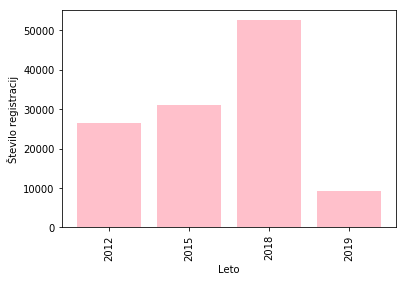

In [81]:
#število registriranih bencinskih avtomobilov
plt.bar(range(len(bencin)), bencin.values(), color='pink')
plt.xticks(range(len(leto)), leto)
plt.xticks(rotation=90)
plt.ylabel('Število registracij')
plt.xlabel('Leto')
plt.show()

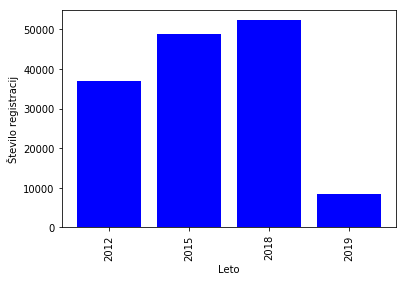

In [82]:
#število registriranih dizelskih avtomobilov
plt.bar(range(len(dizel)), dizel.values(), color='blue')
plt.xticks(range(len(leto)), leto)
plt.xticks(rotation=90)
plt.ylabel('Število registracij')
plt.xlabel('Leto')
plt.show()


In [83]:
dizel
#b12 31349, b15 441456, b18 742440, b19 17786 
#d12 49602, d15 781968, d18 906780, d19 24742

{'2012': 36875, '2015': 48893, '2018': 52272, '2019': 8375}

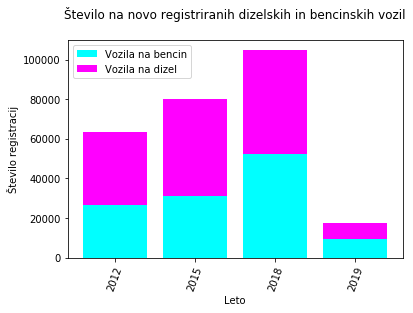

In [84]:
x = range(4)
plt.bar(x, ben, color='cyan', align='center', label='Vozila na bencin')
plt.bar(x, diz, bottom=ben, color='magenta', align='center', label='Vozila na dizel')
plt.xticks(x)
plt.gca().set_xticklabels(leto, rotation=70)
plt.ylabel('Število registracij')
plt.xlabel('Leto')
plt.title('Število na novo registriranih dizelskih in bencinskih vozil\n')
plt.legend();
#plt.savefig('goriva_st.png', bbox_inches='tight')


In [68]:
"""Pri tej hipotezi sva želela prikazati razliko med novo rgistriranimi vozili na becin in dizel skozi zadnjih nekaj let.
Za prikaz sva uporabila podatke o registracija iz let 2012, 2015,2018 in 2019 oz. sprememba na vsaka 3 leta. 
Kot lahko razberemo iz grfva so v splošnem dizelska vozila veliko bolj priljubljena kot bencinska, pribljenost pa z leti tudi narašča
Vidimo lahko tudi, da se samo število novih registracij enakomerno veča skozi let.
Pri vozilih na bencin opazimo, da je število regsitracij v letih 2012 in 2015 približno enako, medtem ko v letu 2018 naraste za 45%
Število registracij dizelskih vozil pa se veča bolj enakomerno, kjer je še vedno večji preskok med leti 2015 in 2018.
Prikazala sva tudi podatke za leto 2019, vendar ker sva imela na voljo podatke le za mesec januar in februar nam to ne pomaga pri prikazu hipoteze.
Še vedno pa lahko vidimo da so tudi v letošnjem letu bolj priljubljena dizelska vozila."""

'Pri tej hipotezi sva želela prikazati razliko med novo rgistriranimi vozili na becin in dizel skozi zadnjih nekaj let.\nZa prikaz sva uporabila podatke o registracija iz let 2012, 2015,2018 in 2019 oz. sprememba na vsaka 3 leta. \nKot lahko razberemo iz grfva so v splošnem dizelska vozila veliko bolj priljubljena kot bencinska, pribljenost pa z leti tudi narašča\nVidimo lahko tudi, da se samo število novih registracij enakomerno veča skozi let.\nPri vozilih na bencin opazimo, da je število regsitracij v letih 2012 in 2015 približno enako, medtem ko v letu 2018 naraste za 45%\nŠtevilo registracij dizelskih vozil pa se veča bolj enakomerno, kjer je še vedno večji preskok med leti 2015 in 2018.\nPrikazala sva tudi podatke za leto 2019, vendar ker sva imela na voljo podatke le za mesec januar in februar nam to ne pomaga pri prikazu hipoteze.\nŠe vedno pa lahko vidimo da so tudi v letošnjem letu bolj priljubljena dizelska vozila.'

In [10]:
##Ali v večjih mestih prevladujejo manjši avtomobili proti večjim?
## povprečna dolžina = 4,465 mm

In [ ]:
#C1.3-Obcina uporabnika vozila (oznaka)
#Ljubljana - 61
#Maribor - 70
#Koper - 50
#Kranj - 52
#Ptuj - 96
#Laško - 57
#Nova Gorica - 84
#Celje - 3
#mesta = ['Ljubljana', 'Maribor', 'Koper', 'Kranj', 'Ptuj', 'Laško', 'Nova Gorica', 'Celje']
#id_mesta = [61, 70, 50, 52, 96, 57, 84, 3]


In [7]:
obcine = dict()
manjsa_vozila = []
vecja_vozila = []
st = 0

temp18 = data18[data18['J-Kategorija in vrsta vozila (oznaka)'] == 'M1']
man_voz = temp18[temp18['Y.1-Dolzina'] <= 4465] 
vec_voz = temp18[temp18['Y.1-Dolzina'] > 4465] 

print(id_mesta)

for id_m in id_mesta:
    print(id_m)
    manjsa_vozila.append(len(man_voz[man_voz['C1.3-Obcina uporabnika vozila (oznaka)'] == id_m]))
    vecja_vozila.append(len(vec_voz[vec_voz['C1.3-Obcina uporabnika vozila (oznaka)'] == id_m]))

#print(manjsa_vozila)
#print(vecja_vozila)


['061', '070', '003', '052', '050', '133', '085', '096', '129', '043']
061
070
003
052
050
133
085
096
129
043


Text(0.5, 0, 'Mesto')

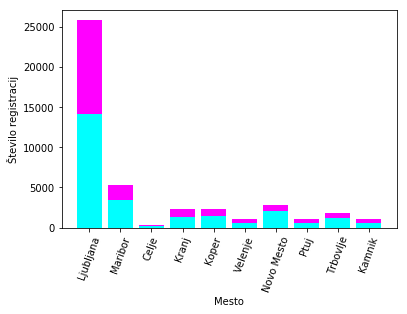

In [8]:
x = range(len(mesta))
plt.bar(x, manjsa_vozila, color='cyan', align='center', label='Manjsa vozila')
plt.bar(x, vecja_vozila, bottom=manjsa_vozila, color='magenta', align='center', label='vecja vozila')
plt.xticks(x)
plt.gca().set_xticklabels(mesta, rotation=70)
plt.ylabel('Število registracij')
plt.xlabel('Mesto')
#plt.title('Število na novo registriranih dizelskih in bencinskih vozil\n')
#plt.legend();
#plt.savefig('goriva_st.png', bbox_inches='tight')

